# MIST (Modified National Institute of Standards and Technology)

In [1]:
# Adapted from https://docs.python.org/3/library/gzip.html

import tensorflow as tf

# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For unzipping the file within the script.
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

C:\Users\niall\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The MNIST dataset is derived form the NIST dataset. It contain four zipped files which contain bytes that we can read using the gzip module to unzip them in the script itself.

In [2]:
type(file_content)

bytes

In [26]:
# Outputs hexideicmal characters printing each byte of the file
file_content[0:4]

b'\x00\x00\x08\x03'

Because the images in MNIST are made up of bytes at th begining of each file the first four bytes represent a number reffered to as a magic number in this case the magic number is 2051. 

The purpose of this is to ensure that the data is being read correctly. By looking at the table found at: http://yann.lecun.com/exdb/mnist/ for this one of the four files we can see the set of expected magic number, number of images and number of row and columns are contained withing the first 12 Bytes.

In [24]:
# Taken in big endian and we get the magic number 2051
int.from_bytes( file_content[0:4], byteorder='big')   

2051

In [5]:
# Number of images in the file
int.from_bytes( file_content[4:8], byteorder='big')

10000

In [6]:
# Number of rows
int.from_bytes(file_content[8:12], byteorder='big')

28

In [7]:
# Number of columns
int.from_bytes(file_content[12:16], byteorder='big')

28

In [8]:
int.from_bytes(file_content[278:279], byteorder='big')

163

In [9]:
l = file_content[16:800]

In [10]:
type(l)

bytes

In [11]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

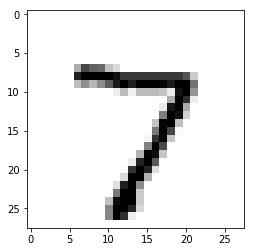

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

We can see by comparing the images of the 7 and 2 that the ~ character converts the image simliar to how dilation works.

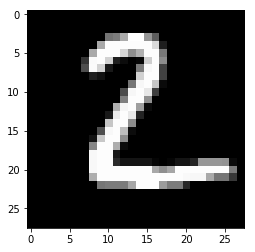

In [23]:
image = np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

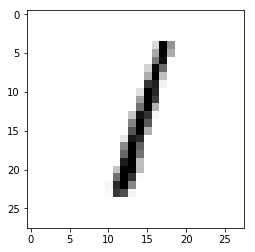

In [14]:
image = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

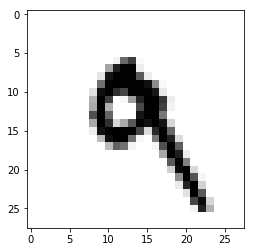

In [15]:
image = ~np.array(list(file_content[5504:6288])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

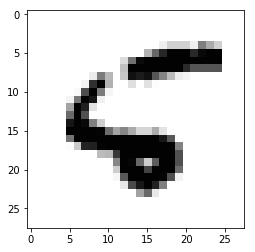

In [16]:
image = ~np.array(list(file_content[6288:7072])).reshape(28,28).astype(np.uint8)
plt.imshow(image, cmap='gray')

In [17]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [18]:
int.from_bytes(labels[8:9], byteorder="big")

7

In [19]:
int.from_bytes(labels[9:10], byteorder="big")

2

In [20]:
int.from_bytes(labels[10:11], byteorder="big")

1

In [21]:
int.from_bytes(labels[15:16], byteorder="big")

9

In [22]:
int.from_bytes(labels[16:17], byteorder="big")

5